# Child Care Inspection Project
## Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
%matplotlib inline
plt.rcParams.update({'figure.max_open_warning': 0})

## Load data

In [2]:
df= pd.read_csv('Child_Care_NY_Dataset.csv', low_memory=False)
df.head()
pd.set_option('display.max_rows', 1000)

In [3]:
df.set_index(['Borough'], inplace=True)
data=df.sort_index()

In [4]:
data.head()

,CenterName,LegalName,Building,Street,ZipCode,PermitExpiration,Status,AgeRange,MaximumCapacity,DayCareID,...,CriticalViolationRate,AverageCriticalViolationRate,InspectionDate,RegulationSummary,ViolationCategory,ViolationStatus,InspectionSummaryResult,Operated_time,time,How_long
Borough,,,,,,,,,,,,,,,,,,,,,
BRONX,SBCC,THE GARVEY SCHOOL,950,BAYCHESTER AVENUE,10475,2015-01-23,Active,2 YEARS - 5 YEARS,0,DC22770,...,50.0,31.6026,2017-05-15,School-based child care staff observed caring ...,GENERAL,CORRECTED,Initial Annual Inspection - Reinspection Required,16458 days 00:00:00.000000000,16458,10.0
BRONX,ST. JEMUEL GROUP FAMILY DAY CARE INC,ST. JEMUEL GROUP FAMILY DAY CARE INC,2836,WEBB AVENUE,10468,2019-06-27,Permitted,2 YEARS - 5 YEARS,40,DC21637,...,60.0,31.8580,2018-11-08,There were no new violations observed at the t...,0,0,Initial Annual Inspection - Passed inspection ...,2191 days 00:00:00.000000000,2191,5.0
BRONX,"BRIGHTSIDE ACADEMY, INC.","BRIGHTSIDE ACADEMY,INC.",1334,LOUIS NINE BOULEVARD,10459,2019-10-13,Permitted,2 YEARS - 5 YEARS,147,DC20994,...,40.0,31.8580,2018-12-18,At time of inspection floors/walls ceilings we...,GENERAL,CORRECTED,Compliance Inspection of Open Violations - Rei...,2922 days 00:00:00.000000000,2922,5.0
BRONX,GKO GROUP INCORPORATED,GKO GROUP INCORPORATED,4020,EAST TREMONT AVENUE,10460,2019-08-28,Permitted,0 YEARS - 2 YEARS,28,DC1588,...,20.0,29.7454,2018-07-18,Safe sleep environment not provided in infant ...,PUBLIC HEALTH HAZARD,CORRECTED,Initial Annual Inspection - Reinspection Requi...,5199 days 00:00:00.000000000,5199,10.0
BRONX,"BRIGHTSIDE ACADEMY, INC.","BRIGHTSIDE ACADEMY, INC.",1362,JEROME AVENUE,10452,2019-01-30,Expired-In Renewal,2 YEARS - 5 YEARS,106,DC26009,...,60.0,31.8580,2019-02-14,There were no new violations observed at the t...,0,0,Monitoring Inspection Non-Routine - Passed ins...,1461 days 00:00:00.000000000,1461,3.0


In [5]:
# print the informations about df
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 41772 entries, BRONX to STATEN ISLAND
Data columns (total 31 columns):
CenterName                                41772 non-null object
LegalName                                 41772 non-null object
Building                                  41772 non-null object
Street                                    41772 non-null object
ZipCode                                   41772 non-null int64
PermitExpiration                          41772 non-null object
Status                                    41772 non-null object
AgeRange                                  41772 non-null object
MaximumCapacity                           41772 non-null int64
DayCareID                                 41772 non-null object
ProgramType                               41772 non-null object
FacilityType                              41772 non-null object
ChildCareType                             41772 non-null object
DatePermitted                             41772 non-nu

## Creation of Subset Data for Plotting

In [6]:
#Divide the data 5 region subset
data0=data[data.ViolationRatePercent>0]
Bronx_data=data0.loc[('BRONX')]
Manhattan_data=data0.loc[('MANHATTAN')]
Queens_data=data0.loc[('QUEENS')]
StatenIsland_data=data0.loc[('STATEN ISLAND')]
Brooklyn_data=data0.loc[('BROOKLYN')]
#Divide each region subset to three facility type subset
Bronx_data.set_index(['FacilityType'], inplace=True)
Bronx_df=Bronx_data.sort_index()
Bronx_camp_data=Bronx_df.loc[('camp')]
Bronx_gdc_data=Bronx_df.loc[('gdc')]
Bronx_sbcc_data=Bronx_df.loc[('sbcc')]
Manhattan_data.set_index(['FacilityType'], inplace=True)
Manhattan_df=Manhattan_data.sort_index()
Manhattan_camp_data=Manhattan_df.loc[('camp')]
Manhattan_gdc_data=Manhattan_df.loc[('gdc')]
Manhattan_sbcc_data=Manhattan_df.loc[('sbcc')]
Queens_data.set_index(['FacilityType'], inplace=True)
Queens_df=Queens_data.sort_index()
Queens_camp_data=Queens_df.loc[('camp')]
Queens_gdc_data=Queens_df.loc[('gdc')]
Queens_sbcc_data=Queens_df.loc[('sbcc')]
StatenIsland_data.set_index(['FacilityType'], inplace=True)
StatenIsland_df=StatenIsland_data.sort_index()
StatenIsland_camp_data=StatenIsland_df.loc[('camp')]
StatenIsland_gdc_data=StatenIsland_df.loc[('gdc')]
StatenIsland_sbcc_data=StatenIsland_df.loc[('sbcc')]
Brooklyn_data.set_index(['FacilityType'], inplace=True)
Brooklyn_df=Brooklyn_data.sort_index()
Brooklyn_camp_data=Brooklyn_df.loc[('camp')]
Brooklyn_gdc_data=Brooklyn_df.loc[('gdc')]
Brooklyn_sbcc_data=Brooklyn_df.loc[('sbcc')]


## Prepare functions for Plotting

In [58]:
def plot_series2(x,y,data,title,fontsize,xlabel,ylabel):
    plt.scatter(x,y,data)
    plt.plot(x,y,data)
    plt.title(title,fontsize=fontsize)
    plt.xlabel(xlabel,fontsize=fontsize)
    plt.ylabel(ylabel,fontsize=fontsize)
    fig = plt.gcf()
    fig.set_size_inches( 10, 12)
    plt.show()

   #  Data

The DOHMH(Department of Health and Mental Hygiene) Child Care Inspection Data is formed by New York City childcare inspection office. The data includes preschools, daycare centers, school-based childcare centers, and camps that are located in New York City. The data presents the childcare program's inspection history over the past three years(between 2016 and 2019). Each row represents a summary of a visit to a specific childcare center for inspection. There are three types of the inspection visits, regular, compliances, and based on reports. A regular visit is for  a general investigation. A compliance visit is to fallow up with the facility for the violations, which are detected at the previous visit. The last type of visit is for reported facilities.

According to data,'Violation Rate Percentages' is a crucial parameter to understand the problems in facilities. Nevertheless, it is hard to comprehend how inspectors calculate the value of the violation rate. The only thing, which explained in the data is that the violation rate consists of 'Critical Violations', 'Public Health Hazard Violations', and 'General violations'. The most serious type of violation is  called 'Public Health Hazard Violations'. According to the New York City regulations these violations must be corrected within one business day. According to the New York City regulations 'Critical Violations' are the second serious type of violations and must be corrected within two weeks. According to the New York City regulations the general violations are minor violations and must be corrected within one month. The New York City Health Department policies indicates that if the number of general violations is less than six a compliance inspection is not required.

There is a huge lack of information in the coding of the data; as a result, terms pertaining to data, - such
as “violation rate” – becomes difficult to decipher. To solve this problem at this stage of my work I used the number of violations as a predictive variable; however it may have relation to inspection visits, which can be understood in the next steps.

   ## Questions:
   
   1. What kind of factors affects the safety level of childcare facilities?
   
   2. Is there a relationship between the inspection report findings and the ratings of the parents?
   
# Exploration the Data

## Plot the number of violations in each region

Below, figure 1 shows that the number of schools that occurred violations according to facility types in each region.

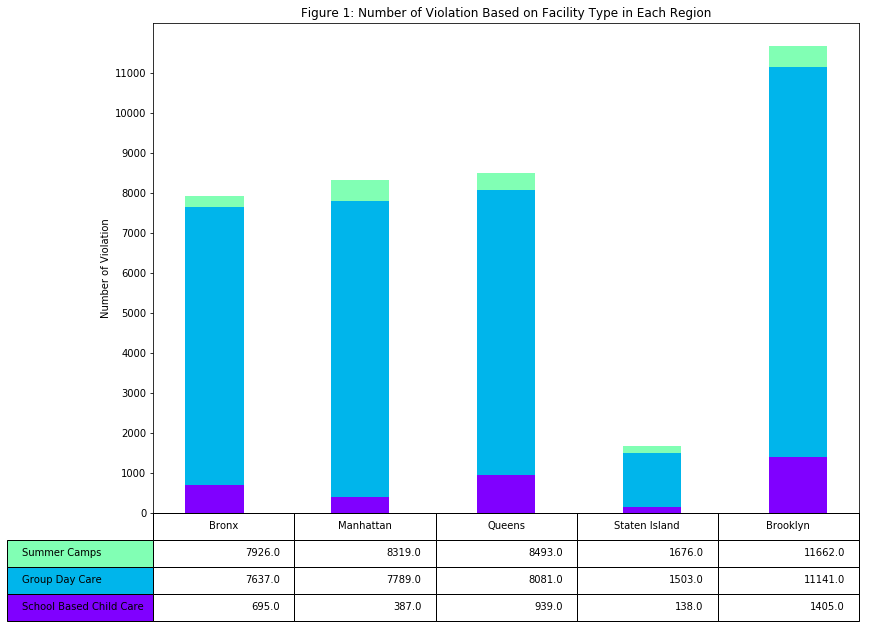

In [7]:
data_t=[[695,387,939,138,1405],[6942,7402,7142,1365,9736],[289,530,412,173,521]]
columns = ('Bronx', 'Manhattan', 'Queens', 'Staten Island', 'Brooklyn')
rows = ['Summer Camps','Group Day Care','School Based Child Care']
values = np.arange(0, 12000, 1000)
value_increment = 1000
colors = plt.cm.rainbow(np.linspace(0, 0.5, len(rows)))
n_rows = len(data_t)
index = np.arange(len(columns)) + 0.3
bar_width = 0.4
y_offset = np.zeros(len(columns))
cell_text = []
for row in range(n_rows):
    plt.bar(index, data_t[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data_t[row]
    cell_text.append(['%1.1f' % x  for x in y_offset])
colors = colors[::-1]
cell_text.reverse()
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.ylabel("Number of Violation")
plt.yticks( values)
plt.xticks([])
plt.title('Figure 1: Number of Violation Based on Facility Type in Each Region')
fig = plt.gcf()
fig.set_size_inches( 14, 10)
plt.show()



Figure 1 demonstrates the number of violations with respect to school regions in the New York City. Brooklyn has the highest number of violation in its facilities and the least amount of violations have been observed in the region of Staten Island.

 ## Hypothesis 1

The null and alternative hypothesis are stated below:

#### H0: There is a relation between the number of schools and the number of the violation.

#### H1: There isn't a relation between the number of schools and the number of the violation.

## Plot the number of schools in each region


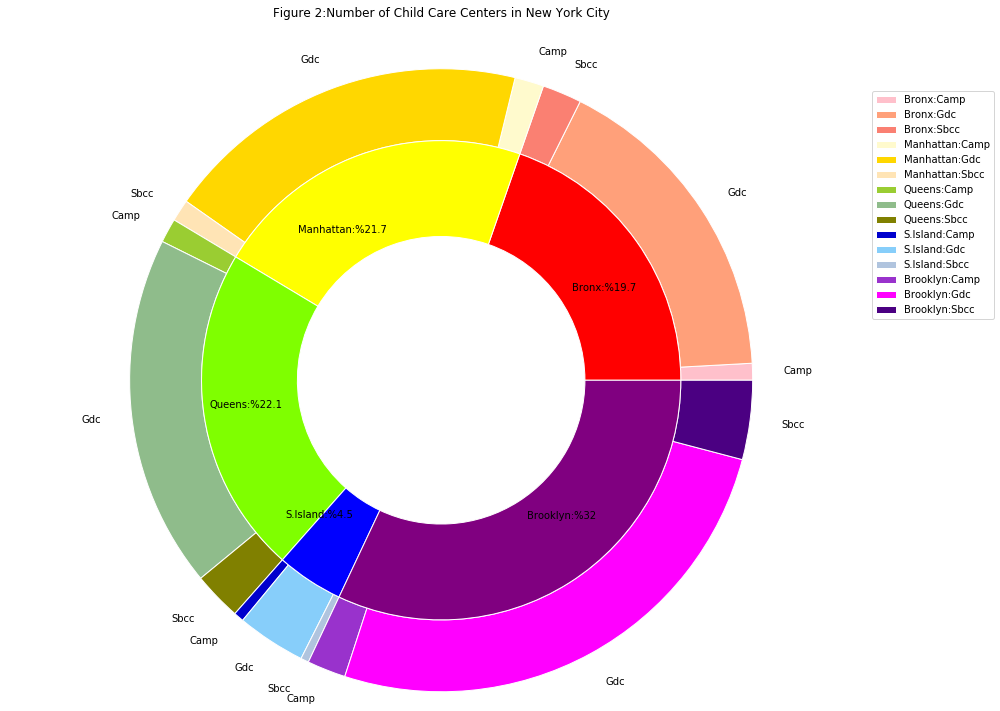

In [8]:
fig, ax = plt.subplots()
ax.axis('equal')
labels = ['Bronx:%19.7', 'Manhattan:%21.7', 'Queens:%22.1', 'S.Island:%4.5','Brooklyn:%32']
sizes = [8219, 9073, 9225, 1885,13370]
labels_facility = ['Camp','Gdc','Sbcc','Camp','Gdc','Sbcc','Camp',
                   'Gdc','Sbcc','Camp','Gdc','Sbcc','Camp','Gdc','Sbcc']
sizes_facility = [364,7003,852,630,7969,474,525,7650,1050,219,1492,174,836,10821,1713]
colors = ['#ff0000', '#ffff00', '#7fff00', '#0000ff','#800080']
colors_facility = ['#ffc0cb','#ffa07a','#fa8072','#fffacd','#ffd700','#ffe4b5','#9acd32','#8FBC8B','#808000',
                 '#0000cd','#87cefa','#b0c4de','#9932cc','#ff00ff','#4b0082' ]
labels_facility_legs=['Bronx:Camp','Bronx:Gdc','Bronx:Sbcc','Manhattan:Camp','Manhattan:Gdc','Manhattan:Sbcc',
                      'Queens:Camp','Queens:Gdc','Queens:Sbcc','S.Island:Camp','S.Island:Gdc','S.Island:Sbcc',
                      'Brooklyn:Camp','Brooklyn:Gdc','Brooklyn:Sbcc']
ax.axis('equal')
mypie, _ = ax.pie(sizes_facility, radius=1.3,labels=labels_facility, colors=colors_facility)
plt.setp( mypie, width=0.3, edgecolor='white')
mypie2, _ = ax.pie(sizes, radius=1.3-0.3, 
labels=labels, labeldistance=0.67, colors=colors)
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
fig = plt.gcf()
fig.set_size_inches( 14, 10)
plt.legend(loc=(0.9, 0.1))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels_facility_legs, loc=(1, 0.6))
ax.set_title("Figure 2:Number of Child Care Centers in New York City",y=1.08)
plt.tight_layout()
plt.show()

Figure 2 demonstrates the facility types in all of the school regions of the New York City.The inner chart presents the percent of the school to the corresponding school region; the outer chart represents the percent of the violations with respect different facility types in the corresponding school region. Brooklyn is the region, which has the highest number of schools in the New York City area, and Staten Island has the least number of schools. As can be seen from the Figure 1, the highest number of violation has been observed in the Brooklyn region and the
number of observed violations in Staten Island is the smallest.

Therefore the null hypothesis is correct. There is a relation between the number of schools and the number of violations. Another point based on the Figure 2 is that the number of group daycare is higher than other types of facilities in each region.

## Plot the number of violations in each facility based on facility type and region

'ID Number' of child center is given as unique for each facility by DOHMH. Facilities are divided based on their type in each graph. Only group daycares divided 2 or three plot on account of the quantity respectively.

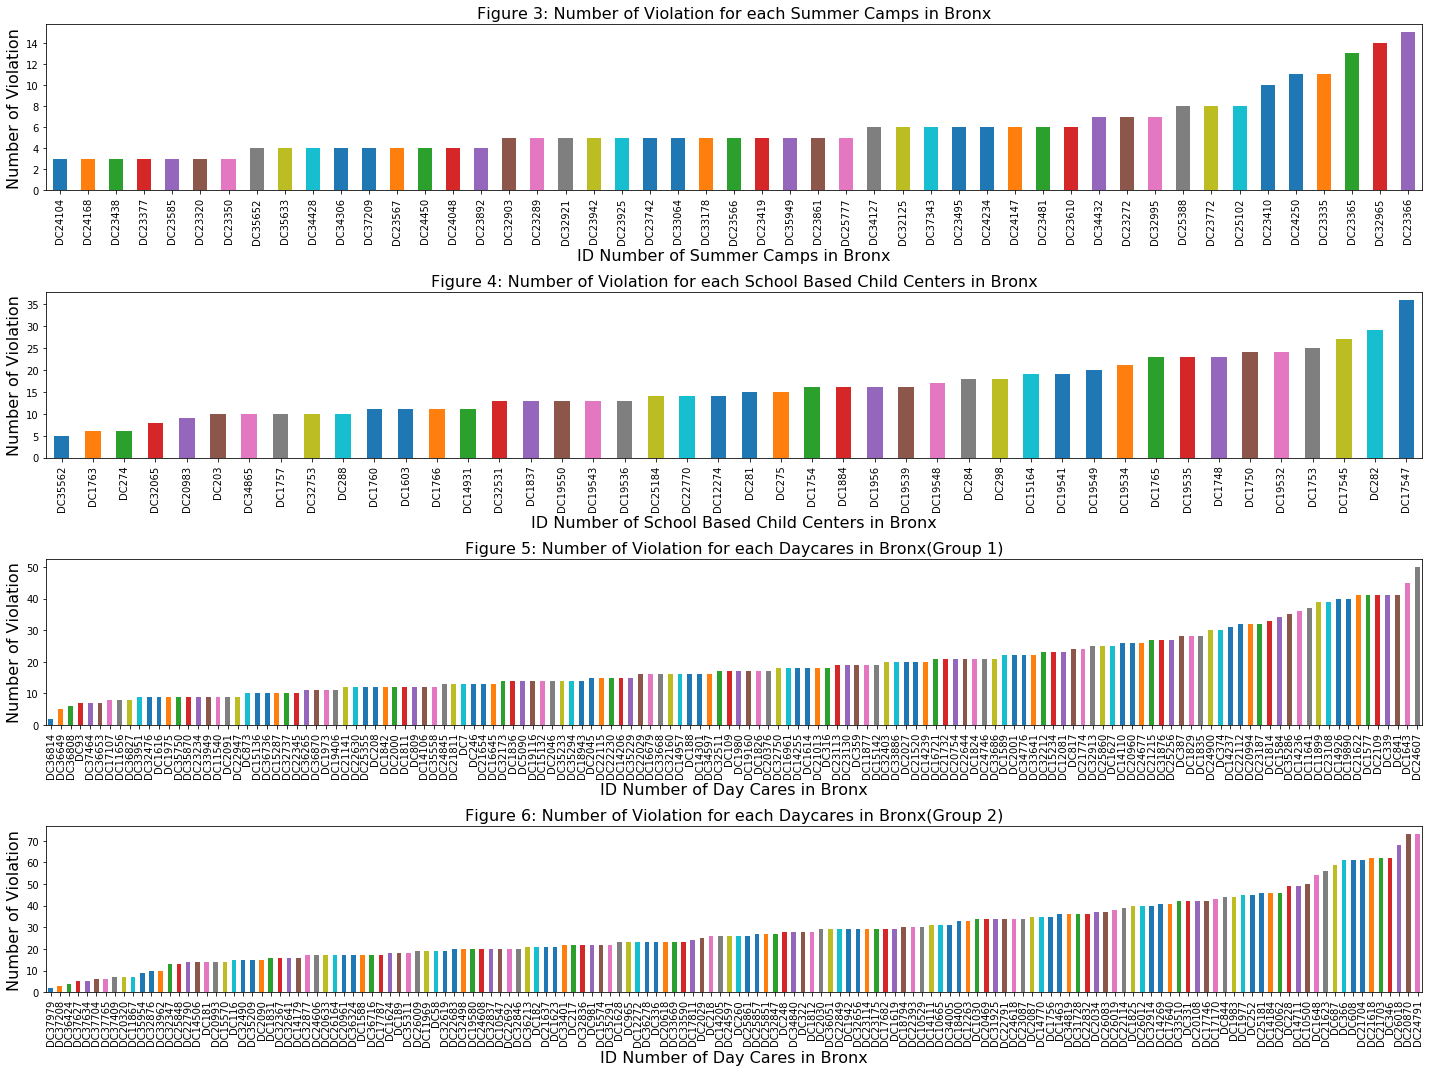

In [94]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(4, 1)
Bronx_camp_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values().plot(kind='bar', figsize=(20,15),
                                                                                        ax=ax1, legend=False)
ax1.set_title('Figure 3: Number of Violation for each Summer Camps in Bronx',fontsize=16)                                                                                      
ax1.set_xlabel('ID Number of Summer Camps in Bronx',fontsize=16)
ax1.set_ylabel('Number of Violation',fontsize=16)
Bronx_sbcc_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values().plot(kind='bar', figsize=(20,15),
                                                                                        ax=ax2, legend=False)                                                                                       
ax2.set_title('Figure 4: Number of Violation for each School Based Child Centers in Bronx',fontsize=16)                                                                                      
ax2.set_xlabel('ID Number of School Based Child Centers in Bronx',fontsize=16)
ax2.set_ylabel('Number of Violation',fontsize=16)
low_risk_Bronx=Bronx_gdc_data.query('ViolationRatePercent<55')
low_risk_Bronx.groupby('DayCareID')['ViolationRatePercent'].count().sort_values().plot(kind='bar', figsize=(20,15),
                                                                                       ax=ax3, legend=False)
ax3.set_title('Figure 5: Number of Violation for each Daycares in Bronx(Group 1)',fontsize=16)                                                                                      
ax3.set_xlabel('ID Number of Day Cares in Bronx',fontsize=16)
ax3.set_ylabel('Number of Violation',fontsize=16)
high_risk_Bronx=Bronx_gdc_data.query('ViolationRatePercent>=55')
high_risk_Bronx.groupby('DayCareID')['ViolationRatePercent'].count().sort_values().plot(kind='bar', figsize=(20,15),
                                                                                        ax=ax4, legend=False)
ax4.set_title('Figure 6: Number of Violation for each Daycares in Bronx(Group 2)',fontsize=16)    
ax4.set_xlabel('ID Number of Day Cares in Bronx',fontsize=16)
ax4.set_ylabel('Number of Violation',fontsize=16)
plt.tight_layout()
plt.show()



It should be pointed out that each plot has a different range of y-axis based on the violation number. For example, in Figure 3, for summer camps the maximum number of violation is 14, but in Figure 6, daycares are more than 70. However, the time range of service for daycares and camps are different. Camps are short term facilities. On the other hand, more than 70 violation number means that in a year, the average inspection visit is 2 in a month. 


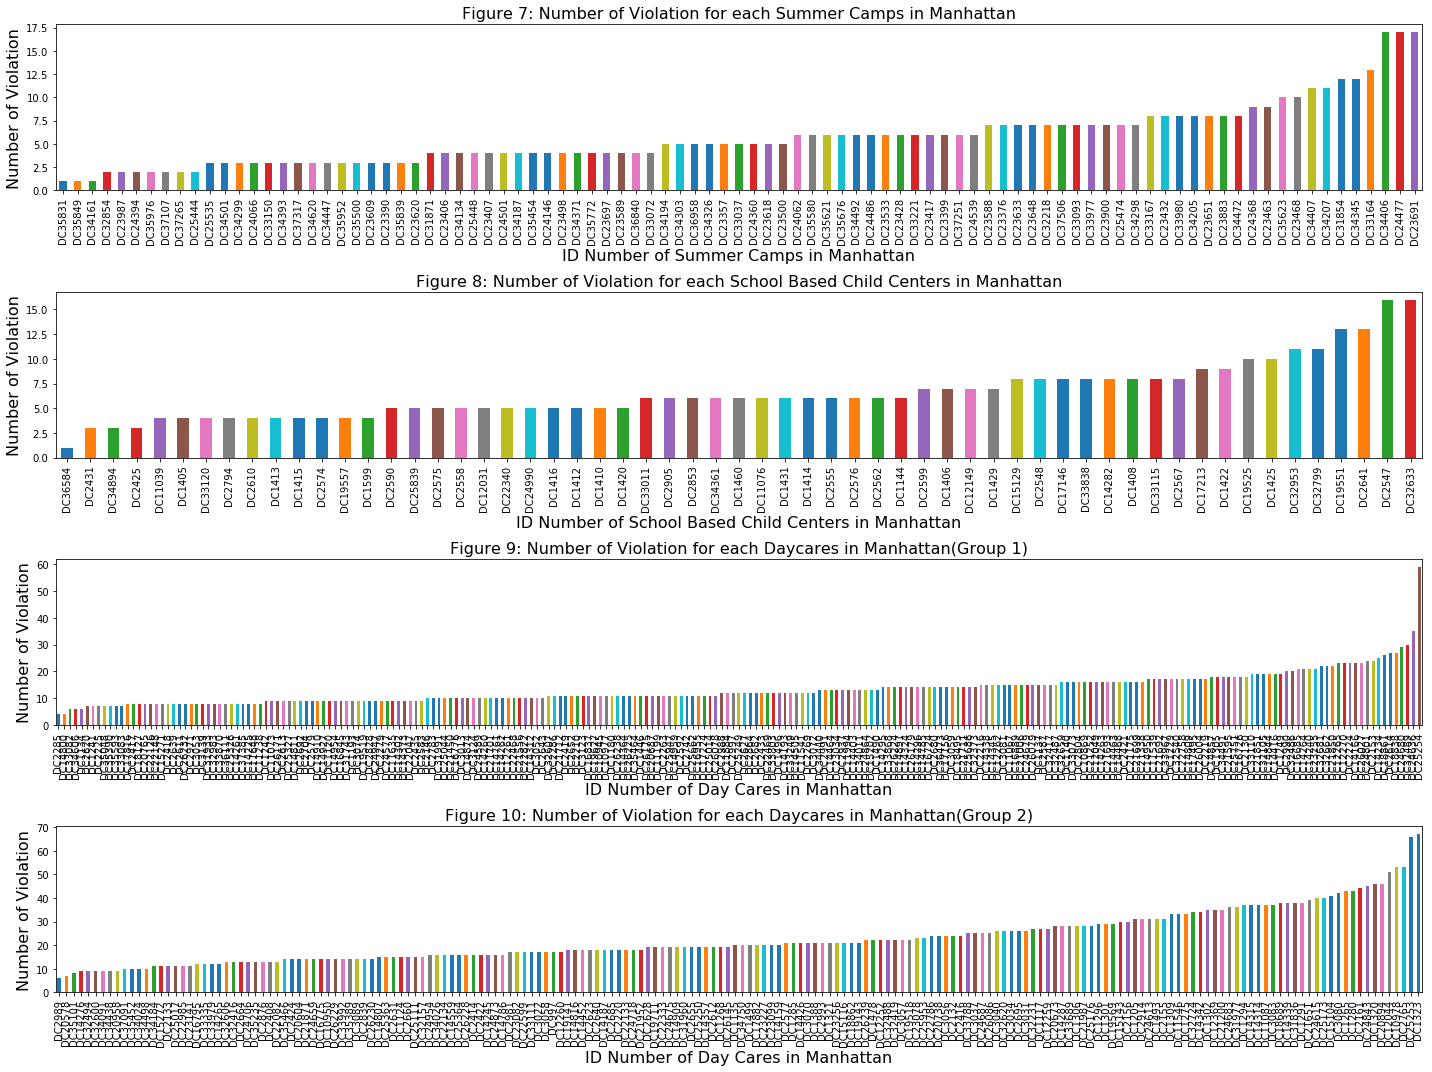

In [95]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(4, 1)
Manhattan_camp_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values().plot(kind='bar', figsize=(20,15),
                                                                                        ax=ax1, legend=False)
ax1.set_title('Figure 7: Number of Violation for each Summer Camps in Manhattan',fontsize=16)                                                                                      
ax1.set_xlabel('ID Number of Summer Camps in Manhattan',fontsize=16)
ax1.set_ylabel('Number of Violation',fontsize=16)
Manhattan_sbcc_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values().plot(kind='bar', figsize=(20,15),
                                                                                        ax=ax2, legend=False)                                                                                       
ax2.set_title('Figure 8: Number of Violation for each School Based Child Centers in Manhattan',fontsize=16)                                                                                      
ax2.set_xlabel('ID Number of School Based Child Centers in Manhattan',fontsize=16)
ax2.set_ylabel('Number of Violation',fontsize=16)
low_risk_Manhattan=Manhattan_gdc_data.query('ViolationRatePercent<36')
low_risk_Manhattan.groupby('DayCareID')['ViolationRatePercent'].count().sort_values().plot(kind='bar', figsize=(20,15),
                                                                                       ax=ax3, legend=False)
ax3.set_title('Figure 9: Number of Violation for each Daycares in Manhattan(Group 1)',fontsize=16)                                                                                      
ax3.set_xlabel('ID Number of Day Cares in Manhattan',fontsize=16)
ax3.set_ylabel('Number of Violation',fontsize=16)
high_risk_Manhattan=Manhattan_gdc_data.query('ViolationRatePercent>=36')
high_risk_Manhattan.groupby('DayCareID')['ViolationRatePercent'].count().sort_values().plot(kind='bar', figsize=(20,15),
                                                                                        ax=ax4, legend=False)
ax4.set_title('Figure 10: Number of Violation for each Daycares in Manhattan(Group 2)',fontsize=16)    
ax4.set_xlabel('ID Number of Day Cares in Manhattan',fontsize=16)
ax4.set_ylabel('Number of Violation',fontsize=16)
plt.tight_layout()
plt.show()

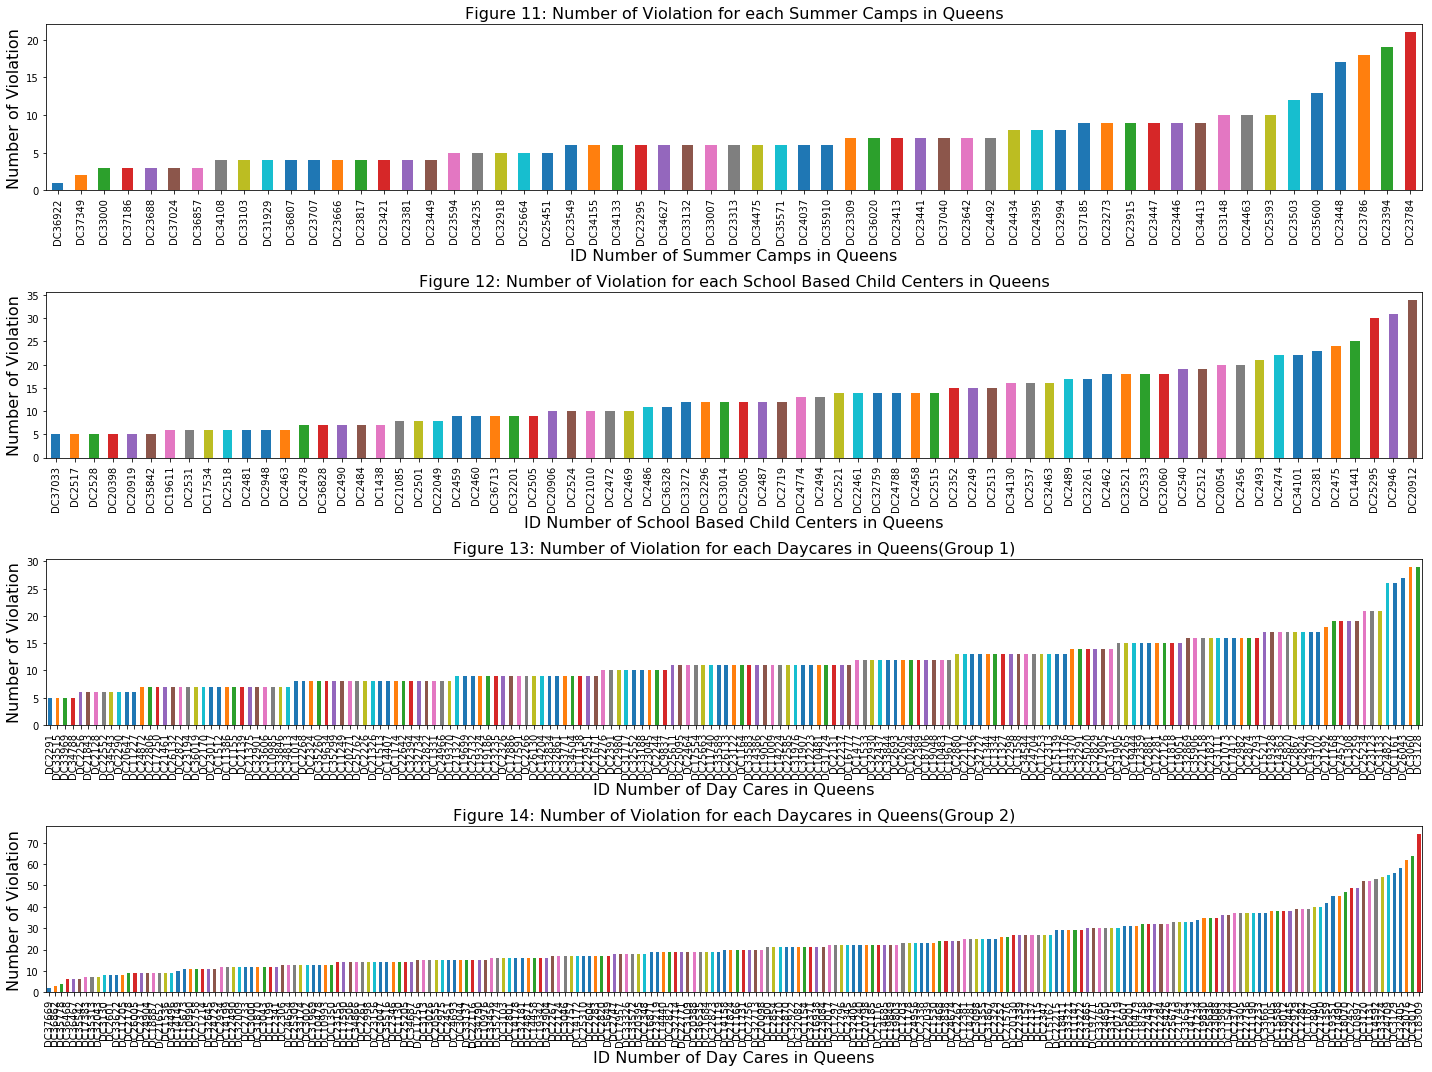

In [96]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(4, 1)
Queens_camp_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values().plot(kind='bar', figsize=(20,15),
                                                                                        ax=ax1, legend=False)
ax1.set_title('Figure 11: Number of Violation for each Summer Camps in Queens',fontsize=16)                                                                                      
ax1.set_xlabel('ID Number of Summer Camps in Queens',fontsize=16)
ax1.set_ylabel('Number of Violation',fontsize=16)
Queens_sbcc_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values().plot(kind='bar', figsize=(20,15),
                                                                                        ax=ax2, legend=False)                                                                                       
ax2.set_title('Figure 12: Number of Violation for each School Based Child Centers in Queens',fontsize=16)                                                                                      
ax2.set_xlabel('ID Number of School Based Child Centers in Queens',fontsize=16)
ax2.set_ylabel('Number of Violation',fontsize=16)
low_risk_Queens=Queens_gdc_data.query('ViolationRatePercent<35')
low_risk_Queens.groupby('DayCareID')['ViolationRatePercent'].count().sort_values().plot(kind='bar', figsize=(20,15),
                                                                                       ax=ax3, legend=False)
ax3.set_title('Figure 13: Number of Violation for each Daycares in Queens(Group 1)',fontsize=16)                                                                                      
ax3.set_xlabel('ID Number of Day Cares in Queens',fontsize=16)
ax3.set_ylabel('Number of Violation',fontsize=16)
high_risk_Queens=Queens_gdc_data.query('ViolationRatePercent>=35')
high_risk_Queens.groupby('DayCareID')['ViolationRatePercent'].count().sort_values().plot(kind='bar', figsize=(20,15),
                                                                                        ax=ax4, legend=False)
ax4.set_title('Figure 14: Number of Violation for each Daycares in Queens(Group 2)',fontsize=16)    
ax4.set_xlabel('ID Number of Day Cares in Queens',fontsize=16)
ax4.set_ylabel('Number of Violation',fontsize=16)
plt.tight_layout()
plt.show()

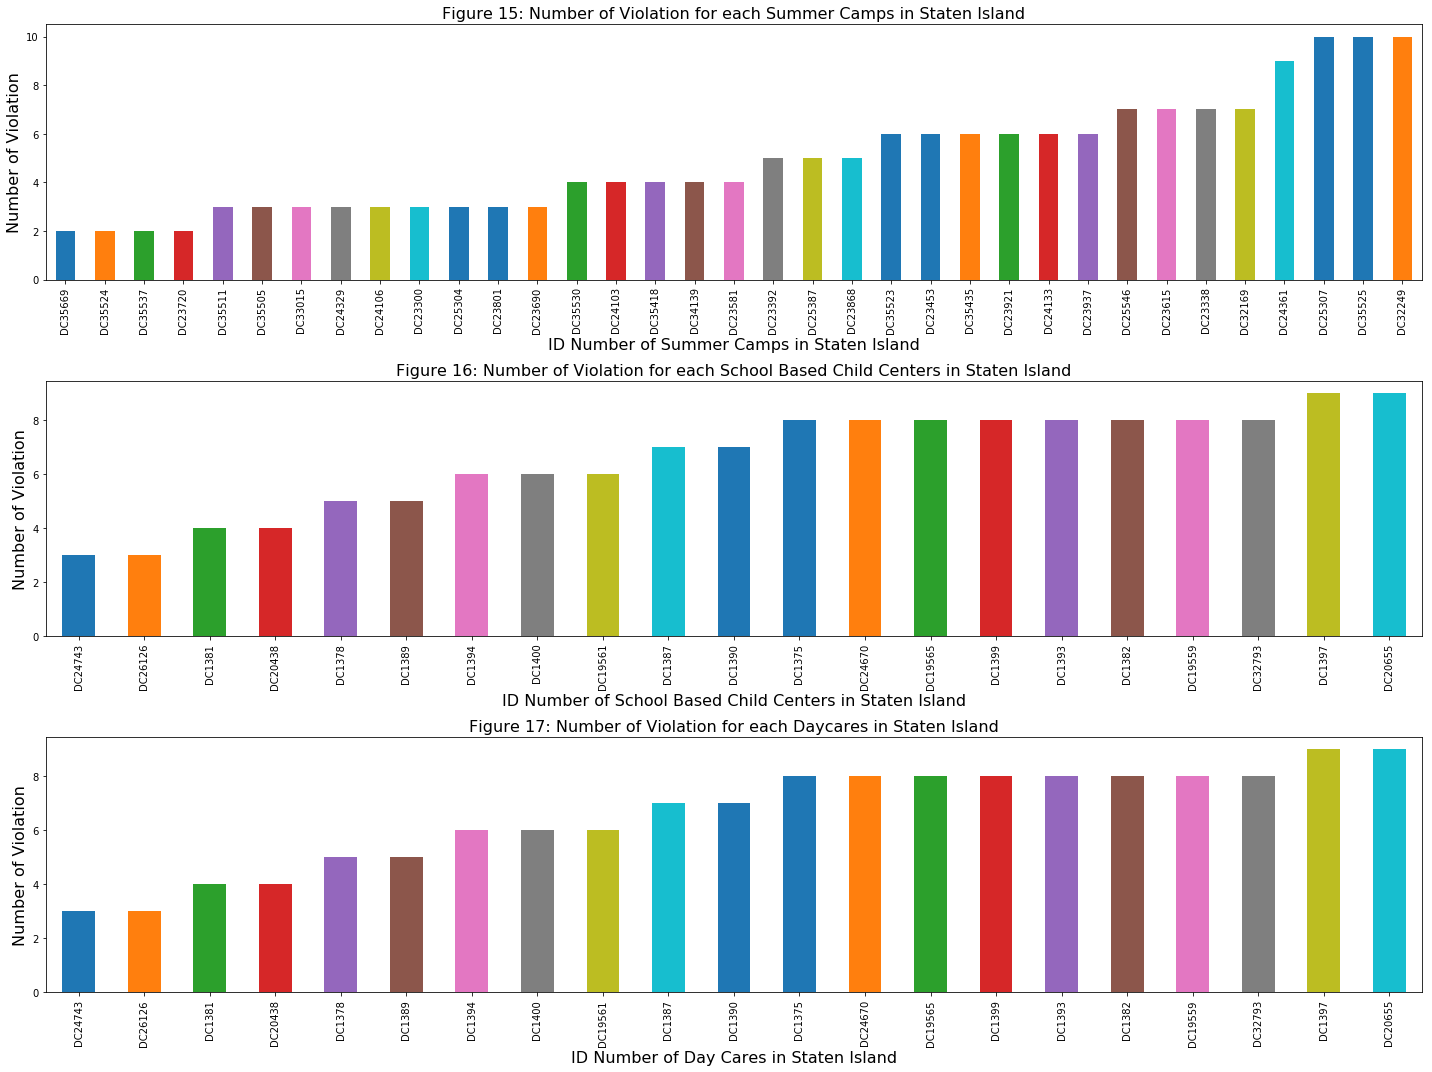

In [97]:
fig, (ax1, ax2,ax3) = plt.subplots(3, 1)
StatenIsland_camp_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values().plot(kind='bar', figsize=(20,15),
                                                                                        ax=ax1, legend=False)
ax1.set_title('Figure 15: Number of Violation for each Summer Camps in Staten Island',fontsize=16)                                                                                      
ax1.set_xlabel('ID Number of Summer Camps in Staten Island',fontsize=16)
ax1.set_ylabel('Number of Violation',fontsize=16)
StatenIsland_sbcc_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values().plot(kind='bar', figsize=(20,15),
                                                                                        ax=ax2, legend=False)                                                                                       
ax2.set_title('Figure 16: Number of Violation for each School Based Child Centers in Staten Island',fontsize=16)                                                                                      
ax2.set_xlabel('ID Number of School Based Child Centers in Staten Island',fontsize=16)
ax2.set_ylabel('Number of Violation',fontsize=16)
StatenIsland_sbcc_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values().plot(kind='bar', figsize=(20,15),
                                                                                       ax=ax3, legend=False)
ax3.set_title('Figure 17: Number of Violation for each Daycares in Staten Island',fontsize=16)                                                                                      
ax3.set_xlabel('ID Number of Day Cares in Staten Island',fontsize=16)
ax3.set_ylabel('Number of Violation',fontsize=16)
plt.tight_layout()
plt.show()

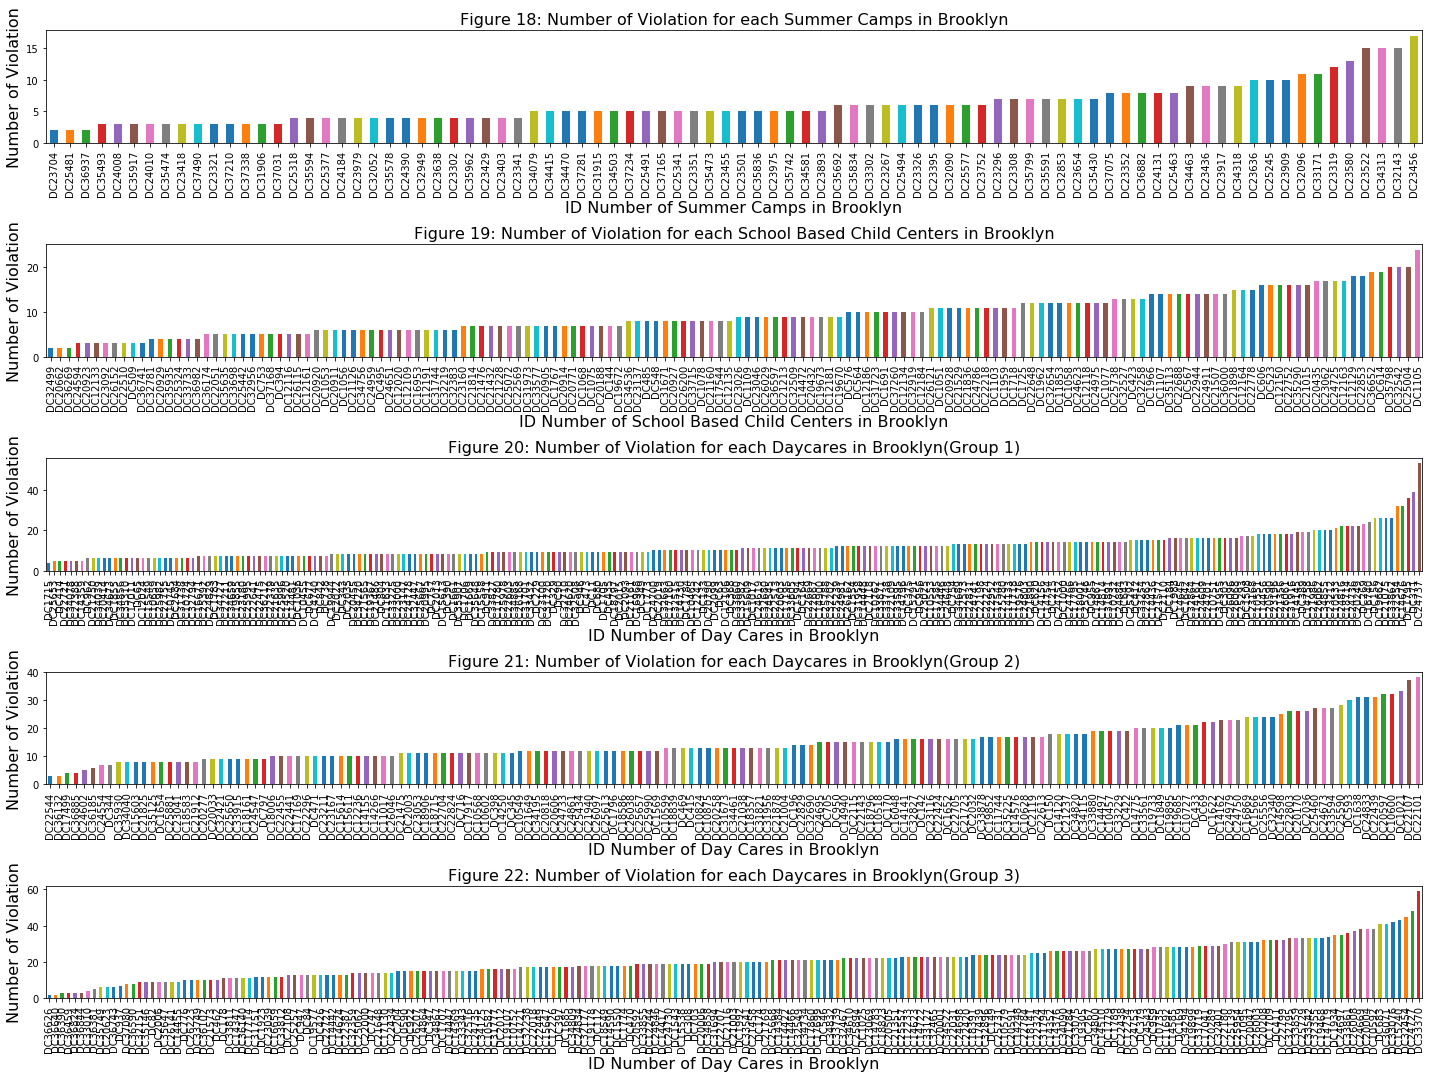

In [98]:
fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(5, 1)
Brooklyn_camp_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values().plot(kind='bar', figsize=(20,15),
                                                                                        ax=ax1, legend=False)
ax1.set_title('Figure 18: Number of Violation for each Summer Camps in Brooklyn',fontsize=16)                                                                                      
ax1.set_xlabel('ID Number of Summer Camps in Brooklyn',fontsize=16)
ax1.set_ylabel('Number of Violation',fontsize=16)
Brooklyn_sbcc_data.groupby('DayCareID')['ViolationRatePercent'].count().sort_values().plot(kind='bar', figsize=(20,15),
                                                                                        ax=ax2, legend=False)                                                                                       
ax2.set_title('Figure 19: Number of Violation for each School Based Child Centers in Brooklyn',fontsize=16)                                                                                      
ax2.set_xlabel('ID Number of School Based Child Centers in Brooklyn',fontsize=16)
ax2.set_ylabel('Number of Violation',fontsize=16)
low_risk_Brooklyn=Brooklyn_gdc_data.query('ViolationRatePercent<30')
low_risk_Brooklyn.groupby('DayCareID')['ViolationRatePercent'].count().sort_values().plot(kind='bar', figsize=(20,15),
                                                                                       ax=ax3, legend=False)
ax3.set_title('Figure 20: Number of Violation for each Daycares in Brooklyn(Group 1)',fontsize=16)                                                                                      
ax3.set_xlabel('ID Number of Day Cares in Brooklyn',fontsize=16)
ax3.set_ylabel('Number of Violation',fontsize=16)
mid_risk_Brooklyn=Brooklyn_gdc_data.query('ViolationRatePercent>=30 & ViolationRatePercent<50')
mid_risk_Brooklyn.groupby('DayCareID')['ViolationRatePercent'].count().sort_values().plot(kind='bar', figsize=(20,15),
                                                                                        ax=ax4, legend=False)
ax4.set_title('Figure 21: Number of Violation for each Daycares in Brooklyn(Group 2)',fontsize=16)    
ax4.set_xlabel('ID Number of Day Cares in Brooklyn',fontsize=16)
ax4.set_ylabel('Number of Violation',fontsize=16)
high_risk_Brooklyn=Brooklyn_gdc_data.query('ViolationRatePercent>=50')
high_risk_Brooklyn.groupby('DayCareID')['ViolationRatePercent'].count().sort_values().plot(kind='bar', figsize=(20,15),
                                                                                        ax=ax5, legend=False)
ax5.set_title('Figure 22: Number of Violation for each Daycares in Brooklyn(Group 3)',fontsize=16)    
ax5.set_xlabel('ID Number of Day Cares in Brooklyn',fontsize=16)
ax5.set_ylabel('Number of Violation',fontsize=16)
plt.tight_layout()
plt.show()


# What kind of factors affect the safety level of childcare facilities?

## 1. The Capacity of the schools

## Hypothesis 2

The null and alternative hypothesis are stated below:

#### H0: There is a relation between the number of students and the number of the violation.

#### H1: There isn't a relation between the number of students and the number of the violation.

## Plot the number of student vs. the number of violations

Below, figure 23 shows that the relation between the number of students and the number of violations in New York.

In [89]:
dfs=df.reset_index()
dff=dfs.groupby(['DayCareID','FacilityType','Borough'],as_index=False).agg({"MaximumCapacity":'mean','ViolationRatePercent':'count',
                                                                 'TotalEducationalWorkers':'mean','How_long':'mean'})

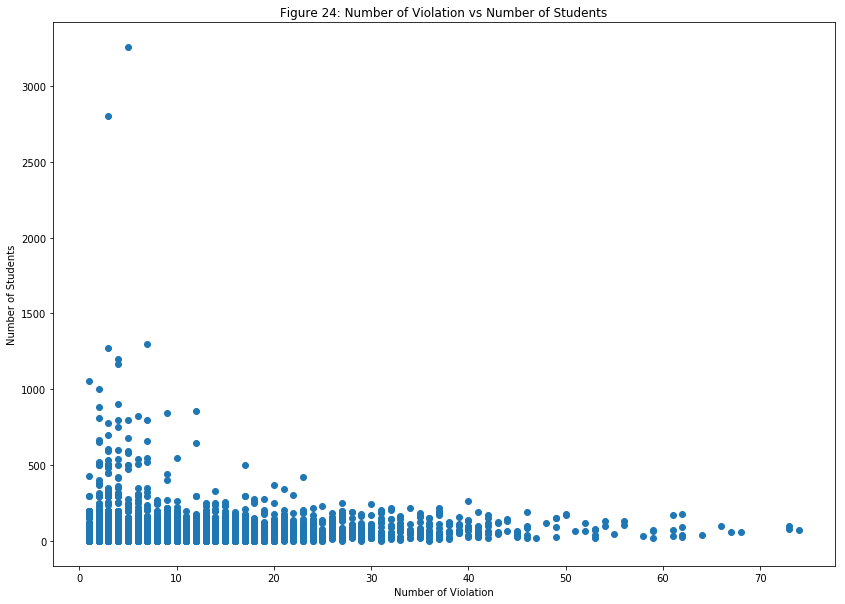

In [61]:
plt.scatter(x=dff.ViolationRatePercent,y=dff.MaximumCapacity)
plt.plot(x=dff.ViolationRatePercent,y=dff.MaximumCapacity)
plt.ylabel("Number of Students")
plt.xlabel('Number of Violation')
plt.title('Figure 24: Number of Violation vs Number of Students')
fig = plt.gcf()
fig.set_size_inches( 14, 10)
plt.show()


Figure 23 shows that there is a negative correlation between the number of students and the number of the violation, which is also correct the second hypothesis. When the number of students is higher, the number of violation is lower. 

## 2. The number of educated staff

## Hypothesis 3

The null and alternative hypothesis are stated below:

#### H0: There is a relation between the number of educated workers and the number of the violation.

#### H1: There isn't a relation between the number of educated workers and the number of the violation.

## Plot the number of educated workers vs. the number of violations

Below, figure 23 shows that the relation between the number of educated workers and the number of violations in New York. Educated workers correspond to a current number of educational staff in the program, including teachers, assistant teachers, teacher directors, and education directors.

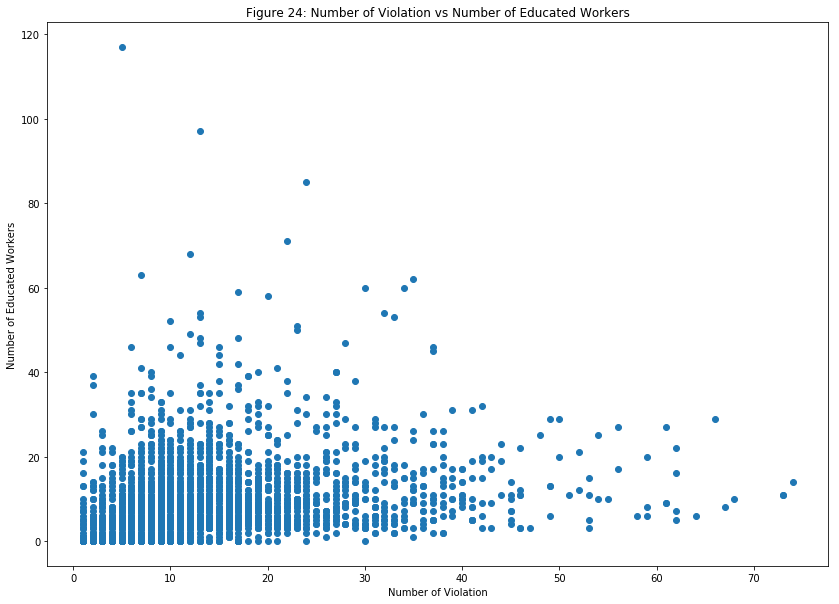

In [46]:
plt.scatter(x=dff.ViolationRatePercent,y=dff.TotalEducationalWorkers)
plt.plot(x=dff.ViolationRatePercent,y=dff.TotalEducationalWorkers)
plt.ylabel("Number of Educated Workers")
plt.xlabel('Number of Violation')
plt.title('Figure 24: Number of Violation vs Number of Educated Workers')
fig = plt.gcf()
fig.set_size_inches( 14, 10)
plt.show()

According to Figure 24, there is a relation between the number of educated staff of a facility and the number of the violation. The low number of violation number is observed around a higher number of educated workers. 

## 3. Operated time of schools

## Hypothesis 3

The null and alternative hypothesis are stated below:

#### H0: There is a relation between the number of years that the facility operated and the number of the violation.

#### H1: There isn't a relation between the number of years that the facility operated and the number of the violation.

## Plot the number of years that the facility operated vs. the number of violations

The number of years that the facilities operated are calculated thorough the permit date and the permit expiration date. The difference between these two dates is sorted to the year ranges.


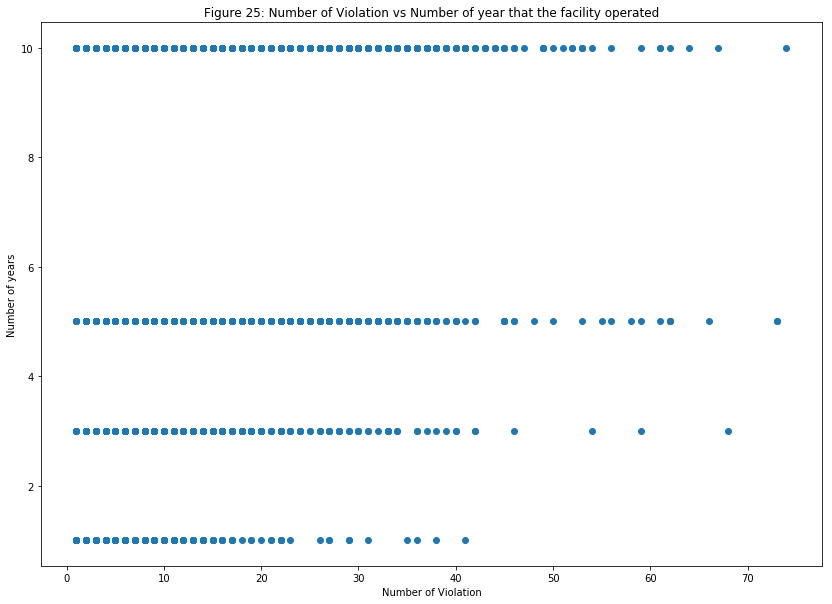

In [47]:
plt.scatter(x=dff.ViolationRatePercent,y=dff.How_long)
plt.plot(x=dff.ViolationRatePercent,y=dff.How_long)
plt.ylabel("Number of years")
plt.xlabel('Number of Violation')
plt.title('Figure 25: Number of Violation vs Number of year that the facility operated')
fig = plt.gcf()
fig.set_size_inches( 14, 10)
plt.show()

As seen in Figure 25, the third hypothesis is correct. The longer time operated facilities have higher violation numbers.

## 4. Facility Types

## Hypothesis 4

The null and alternative hypothesis are stated below:

#### H0: There is a relation between the type the facilities and the number of the violation.

#### H1: There isn't a relationship between the type the facilities and the number of the violation.

## Plot the number of violations based on facility type

There are three types of facilities: group daycare(gdc), camps, school base childcare(sbcc).


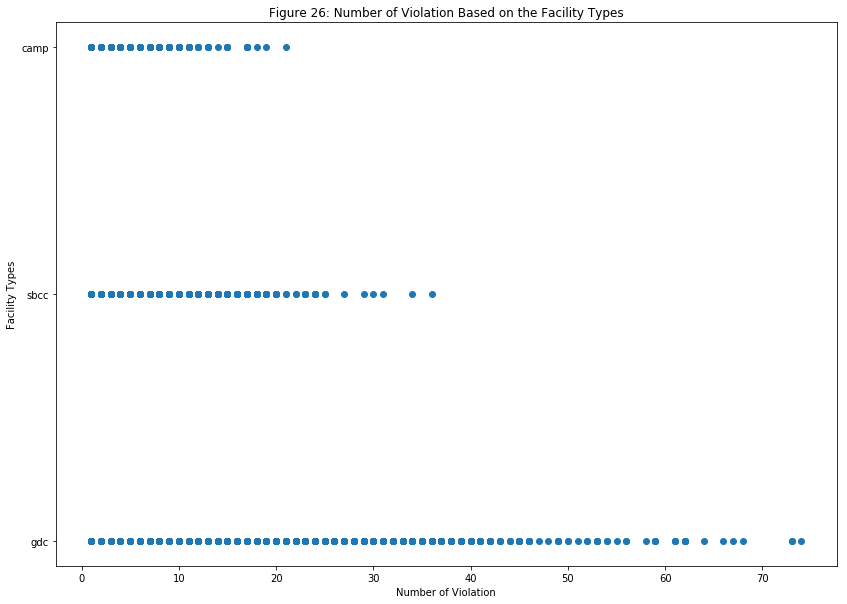

In [48]:
plt.scatter(x=dff.ViolationRatePercent,y=dff.FacilityType)
plt.plot(x=dff.ViolationRatePercent,y=dff.FacilityType)
plt.ylabel("Facility Types")
plt.xlabel('Number of Violation')
plt.title('Figure 26: Number of Violation Based on the Facility Types')
fig = plt.gcf()
fig.set_size_inches( 14, 10)
plt.show()

Figure 26 shows that there is a relation between the facility types and the number of violations. According to the plot, the number of violation is least in summer camps. However, summer camps are short term facilities. They operate for three months. It could affect the amount of visit for inspection. (number of violation=number of inspection) The higher violation numbers are cumulative in group daycares. The number of students and the number of educated workers might have an impact on this result.

## Plot the number of students and the number of educated workers based on facility type


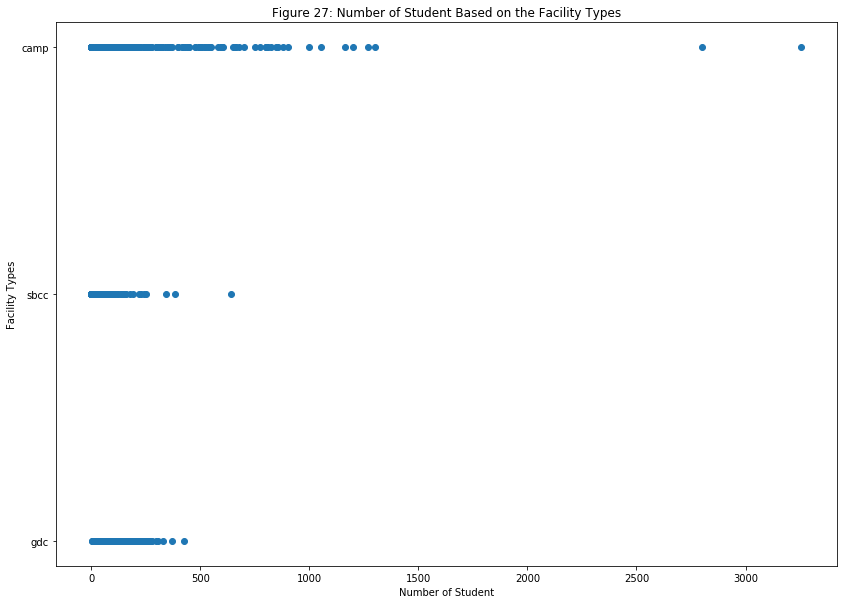

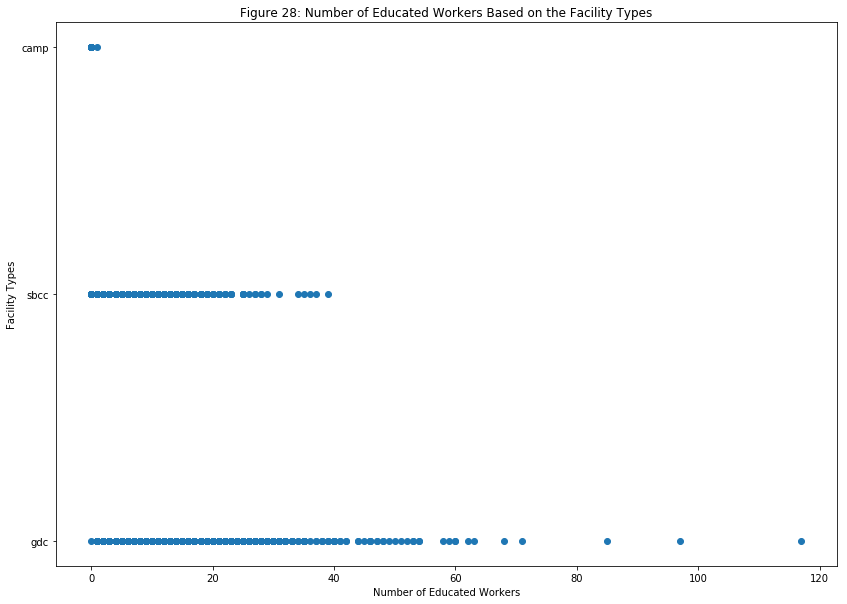

In [54]:
plt.scatter(x=dff.MaximumCapacity,y=dff.FacilityType)
plt.plot(x=dff.MaximumCapacity,y=dff.FacilityType)
plt.ylabel("Facility Types")
plt.xlabel('Number of Student')
plt.title('Figure 27: Number of Student Based on the Facility Types')
fig = plt.gcf()
fig.set_size_inches( 14, 10)
plt.show()
plt.scatter(x=dff.TotalEducationalWorkers,y=dff.FacilityType)
plt.plot(x=dff.TotalEducationalWorkers,y=dff.FacilityType)
plt.ylabel("Facility Types")
plt.xlabel('Number of Educated Workers')
plt.title('Figure 28: Number of Educated Workers Based on the Facility Types')
fig = plt.gcf()
fig.set_size_inches( 14, 10)
plt.show()

Figure 26 verifies the negative relation between the number of violation and the number of students. The number of students is low in group daycare, but the violation number is high. One of the critical points is that based on Figure 27, the number of educated staff is very low in camps.

## 4. Regions

## Hypothesis 5

The null and alternative hypothesis are stated below:

#### H0: There is a relation between the number of violation and the income levels of the region

#### H1: There isn't a relation between the number of violation and the income levels of the region.

## Plot the number of violations based on income

For income, 'Housing NewYork Units By Building' data is used. In this data set, there is the number of total houses based on income levels and regions.

In [62]:
income=pd.read_csv('house_income.csv')

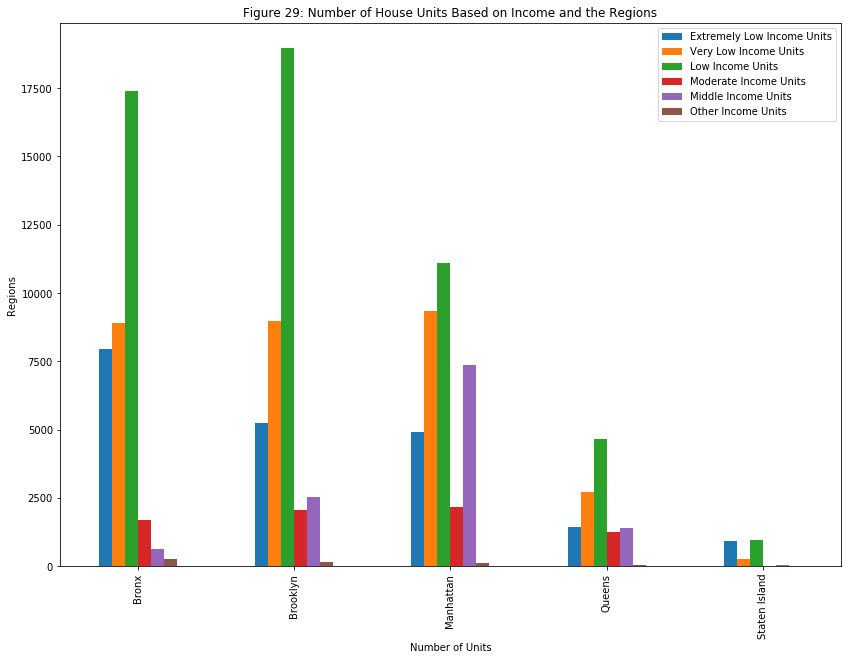

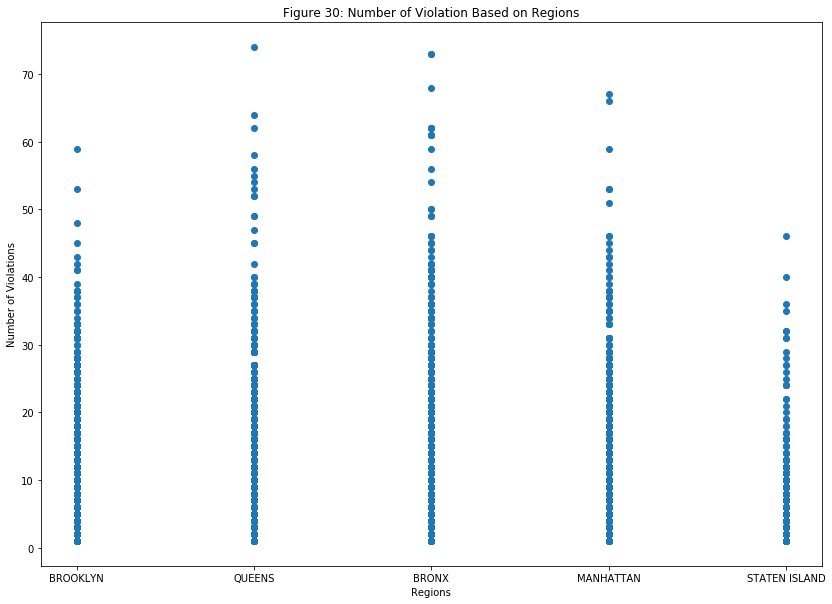

In [93]:
fig, ax = plt.subplots()
income.plot(kind='bar',ax=ax)
ax.set_xticklabels(['Bronx','Brooklyn','Manhattan','Queens','Staten Island'])
plt.ylabel("Regions")
plt.xlabel('Number of Units')
plt.title('Figure 29: Number of House Units Based on Income and the Regions')
fig = plt.gcf()
fig.set_size_inches( 14, 10)
plt.show()
plt.scatter(x=dff.Borough,y=dff.ViolationRatePercent)
plt.plot(x=dff.Borough,y=dff.ViolationRatePercent)
plt.ylabel("Number of Violations")
plt.xlabel('Regions')
plt.title('Figure 30: Number of Violation Based on Regions')
fig = plt.gcf()
fig.set_size_inches( 14, 10)
plt.show()


Figure 29 and Figure 30 show that hypothesis 5 is false. There is not a relationship between the income level of areas and violation numbers.

